# Identifying Optimal Categories for Sales on Amazon Through Product Data Analysis

Created by: Maggie Huang<br>
Created date: 2024/08/30<br>
Last modified: 2024/09/05<br>
Data source: [Kaggle](https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset/data])

## **Objective**

The objective of this project is to identify the most promising categories to sell on Amazon by examining market competition, customer demand, customer satisfaction, and discount competition.

## **Introduction**

This project will clean and analyse Amazon product data to identify the ideal categories to sell on Amazon.

### 1. Data Cleaing
The data cleaning stage will involve converting data types, handling null values, validating data accuracy, removing explicit outliers, and creating new columns based on existing ones.

### 2. Data Analysis
For the analysis, we begin with examining general statistics related to ratings and pricing, which provides us a foundational understanding and overview of the dataset.

Next, we will assess the level of market competition by calculating the total number of products in each category. This step will help gauge the intensity of competition businesses might face when entering a particular category.

In the third stage, we will analyse the total and average number of ratings by category, operating under the assumption that the number of ratings correlates with actual sales performance — categories with higher ratings are likely to have higher sales volumes. This will offer insights into both market demand and customer interest.

Following this, we will also investigate the correlation between the total number of products and the total number of ratings by category. This analysis aims to identify promising categories with relatively low competition compared to its demand and customer interest.

In the fifth stage, we will evaluate customer satisfaction by analysing average ratings in each category. When combined with the average number of ratings, this will help identify categories with high customer satisfaction and strong customer engagement.

Then, we will assess pricing competition by calculating discount amounts and percentages across categories. Selling in categories with high discounts may not be ideal for businesses unable to offer competitive prices due to high production costs or limited scale.

Finally, we will examine the correlation between the total number of products and the average discount percentage across categories, as they may both serve as indicators of market competition.

***

## 1. Data Cleaning

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Change display settings
pd.set_option("display.max_colwidth", None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Read csv data to DataFrame
df = pd.read_csv('./Amazon-Products.csv', usecols=lambda column: column not in ['Unnamed: 0'])
df.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1 Convertible, Copper, Anti-Viral + Pm 2.5 Filter, 2023 Model, White, Gls18I3...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sYL._AC_UL320_.jpg,https://www.amazon.in/Lloyd-Inverter-Convertible-Anti-Viral-GLS18I3FWAMC/dp/B0BRKXTSBT/ref=sr_1_4?qid=1679134237&s=kitchen&sr=1-4,4.2,"2,255","₹32,999","₹58,990"
1,"LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protectio...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctDL._AC_UL320_.jpg,https://www.amazon.in/LG-Convertible-Anti-Virus-Protection-RS-Q19YNZE/dp/B0BQ3MXML8/ref=sr_1_5?qid=1679134237&s=kitchen&sr=1-5,4.2,"2,948","₹46,490","₹75,990"


In [4]:
# Make a copy of the original DataFrame
df_copy = df.copy()

In [5]:
# Get number of rows and columns
df_copy.shape

(551585, 9)

In [6]:
# Get general summary
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 37.9+ MB


In [7]:
# Count number of null values in each column
df_copy.isna().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

*Need to investigate null values and convert data types for the following columns: `ratings`, `no_of_ratings`, `discount_price`, `actual_price`.*

In [8]:
# Check for duplicates
df_copy.duplicated().sum()

0

### 1.1. Deal with `ratings` invalid values and data type

- Convert date type: convert `ratings` to float
- Validate date: change `ratings` invalid values to NA (indicating that the product had no ratings at the time of data collection)

In [9]:
# Get unique `ratings` items
df_copy['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [10]:
# Convert `ratings` column to numeric, coercing errors to NA
df_copy['ratings'] = pd.to_numeric(df_copy['ratings'], errors='coerce')

df_copy['ratings'].describe()

count   369558.00
mean         3.83
std          0.76
min          1.00
25%          3.50
50%          3.90
75%          4.30
max          5.00
Name: ratings, dtype: float64

*All `ratings` data fall within the valid range of 1 to 5 or NA.*

### 1.2. Deal with `no_of_ratings` invalid values and data type

- Convert date types: convert `no_of_ratings` to float
- Validate data: change`no_of_ratings` invalid values to NA (indicating that the product had no ratings at the time of data collection)

In [11]:
# Get the top 5 `no_of_ratings` items
df_copy['no_of_ratings'].head(5)

0    2,255
1    2,948
2    1,206
3       69
4      630
Name: no_of_ratings, dtype: object

In [12]:
# Remove commas in `no_of_ratings` column
df_copy['no_of_ratings'] = df_copy['no_of_ratings'].str.replace(',', '')
# Convert the `no_of_ratings` column to numeric, coercing errors to NA
df_copy['no_of_ratings'] = pd.to_numeric(df_copy['no_of_ratings'], errors='coerce')

df_copy['no_of_ratings'].describe()

count   369558.00
mean       840.78
std       8651.54
min          1.00
25%          4.00
50%         20.00
75%        133.00
max     589547.00
Name: no_of_ratings, dtype: float64

*All `no_of_ratings` data are valid positive numbers or NA.*

### 1.3. Validate data in `ratings` and `no_of_ratings` columns

- Validate data: products with ratings must have valid values in both `ratings` and `no_of_ratings` columns; otherwise, both fields should contain NA

In [13]:
# If either `ratings` or `no_of_ratings` is NA, the other value must also be NA. Check for any rows that violate this rule.
df_copy.loc[
    ((df_copy['ratings'].isna()) & (~df_copy['no_of_ratings'].isna())) # find rows where `ratings` is NA, but `no_of_ratings` is not NA
    | ((~df_copy['ratings'].isna()) & (df_copy['no_of_ratings'].isna())) # find rows where `ratings` is not NA, but `no_of_ratings` is NA
].shape[0]

0

### 1.4. Deal with `actual_price` invalid values and data type

- Convert data type: remove rupee currency symbols and convert `actual_price` to float
- Validate data: replace `actual_price` invalid data with NA (indicating that the product was not available at the time of data collection)
- Remove outliers: remove `actual_price` explicit outliers that are likely incorrect data

In [14]:
# Get a sample of `actual_price` items
df_copy['actual_price'].sample(10)

402288    ₹5,319
181700    ₹2,500
317483      ₹799
462596    ₹2,498
243146      ₹479
129924      ₹549
404700      ₹849
386804    ₹1,099
395955      ₹398
1565      ₹2,345
Name: actual_price, dtype: object

In [15]:
# Remove rupee symbols and commas in the `actual_price` column
df_copy['actual_price'] = df_copy['actual_price'].str.replace('[₹,]', '', regex=True)
# Convert the `actual_price` column to numeric, coercing errors to NA
df_copy['actual_price'] = pd.to_numeric(df_copy['actual_price'], errors='coerce')

df_copy['actual_price'].describe()

count       533772.00
mean         23111.28
std       13550819.54
min              0.00
25%            990.00
50%           1599.00
75%           2999.00
max     9899999999.00
Name: actual_price, dtype: float64

*The maximum `actual_price` of 9,899,999,999 and the minimum of 0 are likely incorrect.*

In [16]:
# Sort DataFrame by `actual_price` to find products with the highest price
df_copy.sort_values(by='actual_price', ascending=False).head(5)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
194625,"Marutivilla Insect Killer, Mosquito Killer Light, 360° Silent Suction Mosquito Killer Trap Zapper Insect Trap Mosquito Rep...",home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/31m-MqnqgtL._AC_UL320_.jpg,https://www.amazon.in/Marutivilla-Mosquito-Suction-Repellent-Energy-Saving/dp/B0BJ6T3JFN/ref=sr_1_6830?qid=1679213725&s=garden&sr=1-6830,2.00,1.00,₹589,9899999999.00
402750,Clovia Women's Activewear Ankle Length Printed Tights,sports & fitness,Running,https://m.media-amazon.com/images/I/61ssMT12tFS._AC_UL320_.jpg,https://www.amazon.in/Clovia-Womens-Activewear-Printed-AB0063P03_Blue_M/dp/B098J58XKX/ref=sr_1_4024?qid=1679217415&s=sports&sr=1-4024,3.20,4.00,₹688,61082990.00
498818,Samsung 214 cm (85 inches) 8K Ultra HD Smart Neo QLED TV QA85QN900AKXXL (Steel),"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/I/91RMUYY13VS._AC_UL320_.jpg,https://www.amazon.in/Samsung-Smart-QA85QN800AKXXL-Steel-Model/dp/B0928K7LKW/ref=sr_1_588?qid=1679128094&s=electronics&sr=1-588,4.00,10.00,"₹12,49,990",1594900.00
311949,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat Diamond Stone Original Certified Real Gemstone Transparent Clarity Brillian...,accessories,Jewellery,https://m.media-amazon.com/images/I/31VTWJnrqsL._AC_UL320_.jpg,https://www.amazon.in/USPTO-Certified-Transparent-Brilliant-Engagement/dp/B09MS3LC6G/ref=sr_1_1383?qid=1679145198&s=jewelry&sr=1-1383,NaN,NaN,"₹4,06,009",1200000.00
390319,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat Diamond Stone Original Certified Real Gemstone Transparent Clarity Brillian...,stores,Men's Fashion,https://m.media-amazon.com/images/I/31VTWJnrqsL._AC_UL320_.jpg,https://www.amazon.in/USPTO-Certified-Transparent-Brilliant-Engagement/dp/B09MS3LC6G/ref=sr_1_16105?qid=1679151488&s=apparel&sr=1-16105,NaN,NaN,"₹4,06,009",1200000.00


In [17]:
# Drop products having an extremely high `actual_price` and a low `discount_price`
df_copy.drop([194625, 402750], inplace=True)

In [18]:
# Filter by `actual_price` to find free products
df_copy.loc[df_copy['actual_price'] == 0]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
253507,Learning The Basics Of Home Theater,"tv, audio & cameras",Home Audio & Theater,https://m.media-amazon.com/images/I/81TMOeVPAzL._AC_UL320_.jpg,https://www.amazon.in/Learning-Basics-Theater-Allan-Turner-ebook/dp/B00DOLNZKO/ref=sr_1_126?qid=1679129901&s=electronics&sr=1-126,3.80,21.00,NaN,0.00
374235,The Sugar Men,stores,Men's Fashion,https://m.media-amazon.com/images/I/81goW+aNWWL._AC_UL320_.jpg,https://www.amazon.in/Sugar-Men-Ray-Kingfisher-ebook/dp/B01BBYK2JM/ref=sr_1_17?qid=1679150696&s=apparel&sr=1-17,4.30,4485.00,NaN,0.00
443775,Learning The Basics Of Home Theater,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/81TMOeVPAzL._AC_UL320_.jpg,https://www.amazon.in/Learning-Basics-Theater-Allan-Turner-ebook/dp/B00DOLNZKO/ref=sr_1_5140?qid=1679129618&s=electronics&sr=1-5140,3.80,21.00,NaN,0.00


In [19]:
# Drop products having an 0 `actual_price`
df_copy.drop([253507, 374235, 443775], inplace=True)

### 1.5. Deal with `discount_price` invalid values & data type

- Convert data type: remove rupee currency symbols and convert `discount_price` to float
- Validate data: fill `discount_price` invalid data with `actual_price` values (indicating that no discount was applied to the product at the time of data collection)

In [20]:
# Get a sample of the `discount_price` items
df_copy['discount_price'].sample(10)

305299      ₹849
133869       NaN
82713       ₹440
339697      ₹349
93230       ₹929
170687      ₹749
64102       ₹299
257132    ₹1,325
111751      ₹709
64508     ₹1,292
Name: discount_price, dtype: object

In [21]:
# Remove rupee symbols and commas in the `discount_price` column
df_copy['discount_price'] = df_copy['discount_price'].str.replace('[₹,]', '', regex=True)
# Convert the `discount_price` column to numeric, coercing errors to NaN
df_copy['discount_price'] = pd.to_numeric(df_copy['discount_price'], errors='coerce')
# Fill NA in `discount_price` with values of `actual_price`
df_copy['discount_price'] = df_copy['discount_price'].fillna(df_copy['actual_price'])

df_copy['discount_price'].describe()

count    533767.00
mean       2872.75
std        9565.82
min           4.00
25%         399.00
50%         699.00
75%        1549.00
max     1249990.00
Name: discount_price, dtype: float64

### 1.6. Validate data in `discount_price` and `actual_price` columns

- Validate data: `discount_price` must be lower than or equal to `actual_price`

In [22]:
# Count number of rows where `discount_price` is greater than `actual_price`
len(df_copy.loc[df_copy['discount_price'] > df_copy['actual_price']])

0

### 1.7. Create columns `discount_amount` and `discount_percent` from `discount_price` and `actual_price`

In [23]:
# Create a new column named `discount_amount` calculating discount values of each product
df_copy = df_copy.assign(discount_amount = lambda x: x['actual_price'] - x['discount_price'])
# Create a new column named `discount_percent` calculating discount percentage of each product
df_copy = df_copy.assign(discount_percent = lambda x: (1 - (x['discount_price'] / x['actual_price'])) * 100)

***

## 2. Data Analysis & Visualisation

### 2.1. General statistics of numerical data

In [24]:
# Get general statistical summary of numerical data
summary = df_copy.describe()
summary

,ratings,no_of_ratings,discount_price,actual_price,discount_amount,discount_percent
count,369553.00,369553.00,533767.00,533767.00,533767.00,533767.00
mean,3.83,840.78,2872.75,4449.64,1576.89,45.26
std,0.76,8651.59,9565.82,12889.37,4766.59,24.53
min,1.00,1.00,4.00,4.00,0.00,0.00
25%,3.50,4.00,399.00,990.00,300.00,28.58
50%,3.90,20.00,699.00,1599.00,700.00,50.01
75%,4.30,133.00,1549.00,2999.00,1548.00,64.58
max,5.00,589547.00,1249990.00,1594900.00,793991.00,99.90


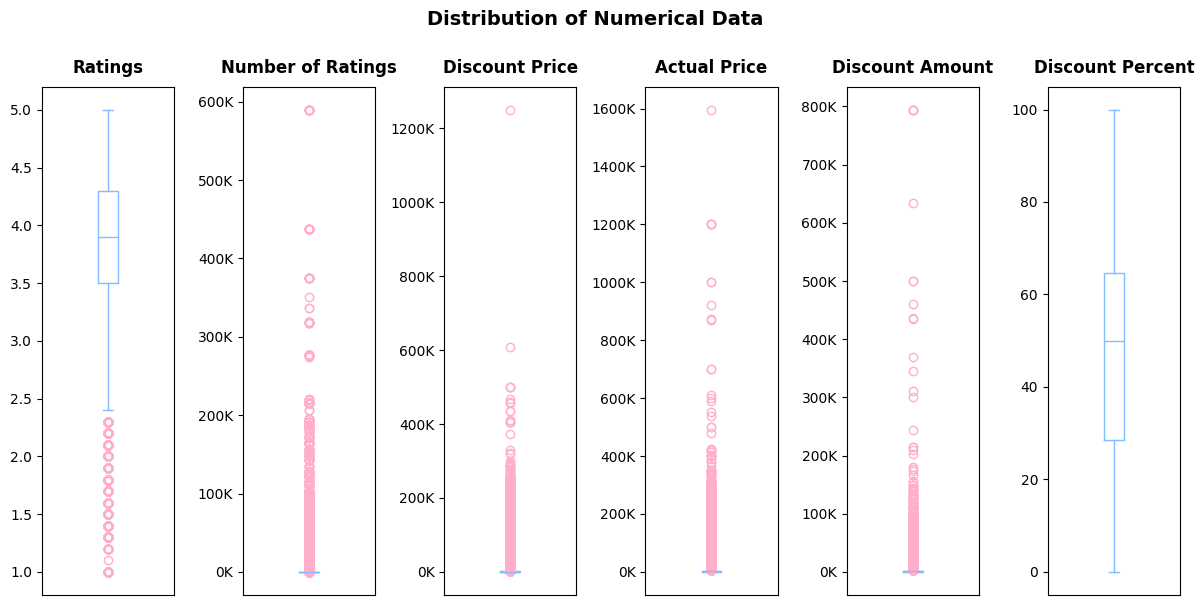

In [25]:
fig, ax = plt.subplots(1, 6, figsize=(12,6))

columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_amount', 'discount_percent']
titles = ['Ratings', 'Number of Ratings', 'Discount Price', 'Actual Price', 'Discount Amount', 'Discount Percent']

for _ in range(6):
    # Create box plots
    df_copy[columns[_]].plot(kind='box', color='#83bcff', flierprops=dict(markeredgecolor='#ffafcc', marker='o'), ax=ax[_])
    # Remove ticks and tick labels for y-axis
    ax[_].get_xaxis().set_visible(False)
    # Add chart title
    ax[_].set_title(titles[_], size=12, fontweight='bold', pad=10)
    # Change y-axis tick labels to thousands (K) for `no_of_ratings`, `discount_price`, `actual_price`, `discount_amount`
    if 0 < _ < 5:
        ax[_].set_yticks(ax[_].get_yticks()[1:-1])
        ax[_].set_yticklabels(['{:.0f}'.format(x) + 'K' for x in ax[_].get_yticks() / 1000])

# Add figure title
fig.suptitle('Distribution of Numerical Data', size=14, fontweight='bold', y=1)

plt.tight_layout()

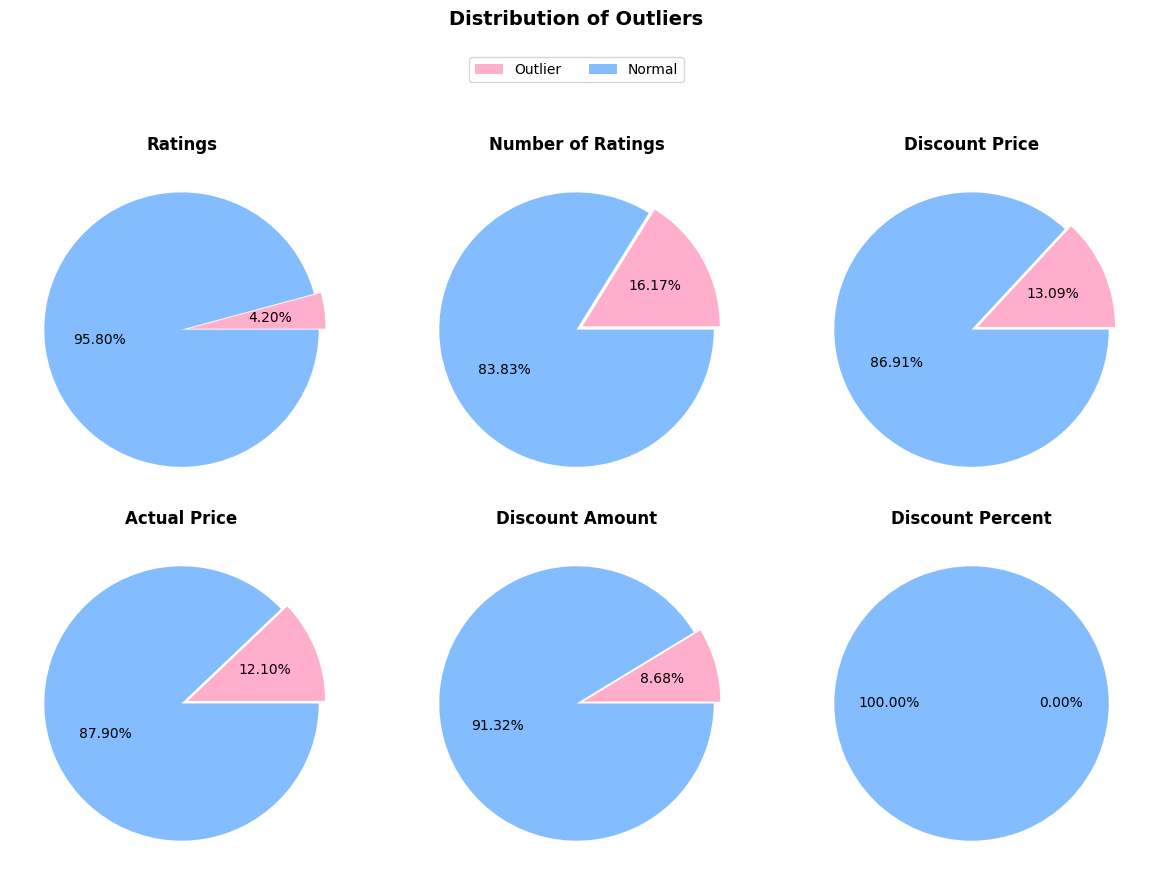

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax1 = ax[0][0]
ax2 = ax[0][1]
ax3 = ax[0][2]
ax4 = ax[1][0]
ax5 = ax[1][1]
ax6 = ax[1][2]

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_amount', 'discount_percent']
titles = ['Ratings', 'Number of Ratings', 'Discount Price', 'Actual Price', 'Discount Amount', 'Discount Percent']

for _ in range(6):
    # Calculate upper and lower bounds of the data to identify outliers
    Q1 = summary.loc['25%', columns[_]]
    Q3 = summary.loc['75%', columns[_]]
    IQR = Q3 - Q1
    LB = Q1 - (IQR * 1.5)
    UB = Q3 + (IQR * 1.5)
    # Calculate numbers of normal and outlier data and store the data in a DataFrame
    outlier_counts = df_copy.loc[(df_copy[columns[_]] < LB) | (df_copy[columns[_]] > UB), columns[_]].count()
    normal_counts = df_copy.loc[(df_copy[columns[_]] >= LB) & (df_copy[columns[_]] <= UB), columns[_]].count()
    pie = pd.DataFrame({'Count': [outlier_counts, normal_counts]}, index=['Outliter', 'Normal'])
    # Create pie charts
    pie.plot(kind='pie', y='Count', colors=['#ffafcc', '#83bcff'], autopct='%.2f%%',
             radius=1, startangle=0, explode=[0.05, 0], labels=None, label='', legend=False, ax=axes[_])
    axes[_].set_title(titles[_], size=12, fontweight='bold')

fig.suptitle('Distribution of Outliers', size=14, fontweight='bold', y=1.1)
fig.legend(labels=['Outlier', 'Normal'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncols=2)

plt.tight_layout()

### 2.2. Total number of products by category

In [27]:
# Get number of unique `main_category`
df_copy['main_category'].nunique()

20

In [28]:
# Genereate a list of the unique categories
category_list = [c for c in df_copy['main_category'].unique()]

# Create a list of 20 colors
color_list = [
    '#f44336', '#e81e63', '#9c27b0', '#673ab7', '#3f51b5',
    '#2196f3', '#03a9f4', '#00bcd4', '#009688', '#4caf50',
    '#8bc34a', '#cddc39', '#ffeb3b', '#ffc107', '#ff9800',
    '#ff5722', '#795548', '#9e9e9e', '#607d8b', '#000000'
]

# Save category and color pairs to dictionary
colormap = dict(zip(sorted(category_list), color_list))

In [29]:
# Create function to map colors with categories
def plot_category_bars(ax, df):
    colors = [colormap[c] for c in df.index]
    df.plot(kind='barh', color=colors, ax=ax)

# Create function to add suptitle
def add_suptitle(fig, sup):
    fig.suptitle(sup, size=14, fontweight='bold')

# Create function to add chart title
def add_chart_title(ax, title):
    ax.set_title(title, size=14, fontweight='bold', pad=20)

# Create function to label axis
def label_axis(ax, xlabel, ylabel):
    ax.set_xlabel(xlabel, size=12, labelpad=20)
    ax.set_ylabel(ylabel, size=12, labelpad=20)

# Create function to format bar chart
def format_bar_chart(ax, y_rotate, fmt):
    # Add data label for bars
    ax.bar_label(ax.containers[0], label_type='edge', size=8, padding=2, fmt=fmt)
    # Rotate tick labels for y-axis
    ax.set_yticklabels(labels=ax.get_yticklabels(), rotation=y_rotate)
    # Remove y-axis ticks
    ax.tick_params(left=False)
    # Remove x-axis ticks and labels
    ax.set_xticks([])
    # Remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

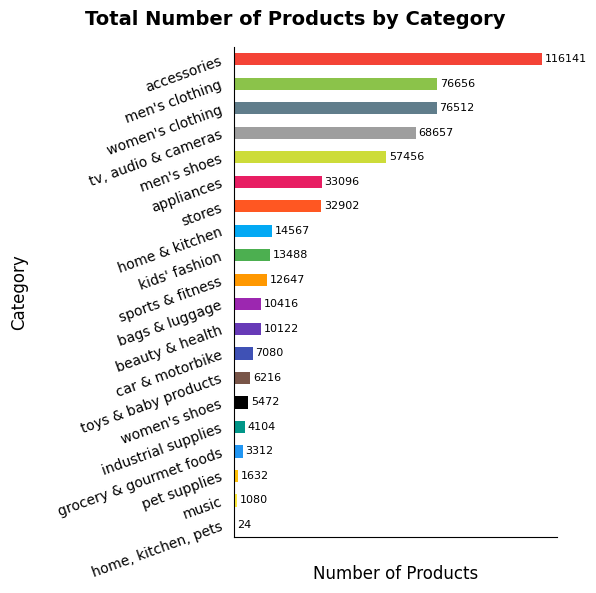

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))

# Group and count number of products in each category
no_of_products = df_copy.groupby(by='main_category')['name'].count().sort_values()

plot_category_bars(ax, no_of_products)

add_suptitle(fig, 'Total Number of Products by Category')
label_axis(ax, 'Number of Products', 'Category')
format_bar_chart(ax, 20, '%.0f')

plt.tight_layout()

*While a high number of products in a category may indicate high market demand, it can also suggest a competitive market that may be challenging to enter and succeed. The number of products within each category can be a significant factor for businesses when deciding which new products to launch on Amazon. Success in popular but competitive categories may require products of higher quality, lower prices, differentiated features, better discount strategies, stronger promotional campaigns, or distinctive brand recognition. Conversely, entering categories with fewer products may involve overcoming challenges such as limited customer demand and market presence.*

*According to the chart, the "accessories" category appears to be critically popular and competitive with over 100,000 products, with approximately 40,000 more products than the "men's clothing" category which ranks 2nd.*

### 2.3. Total number of ratings and average number of ratings by category

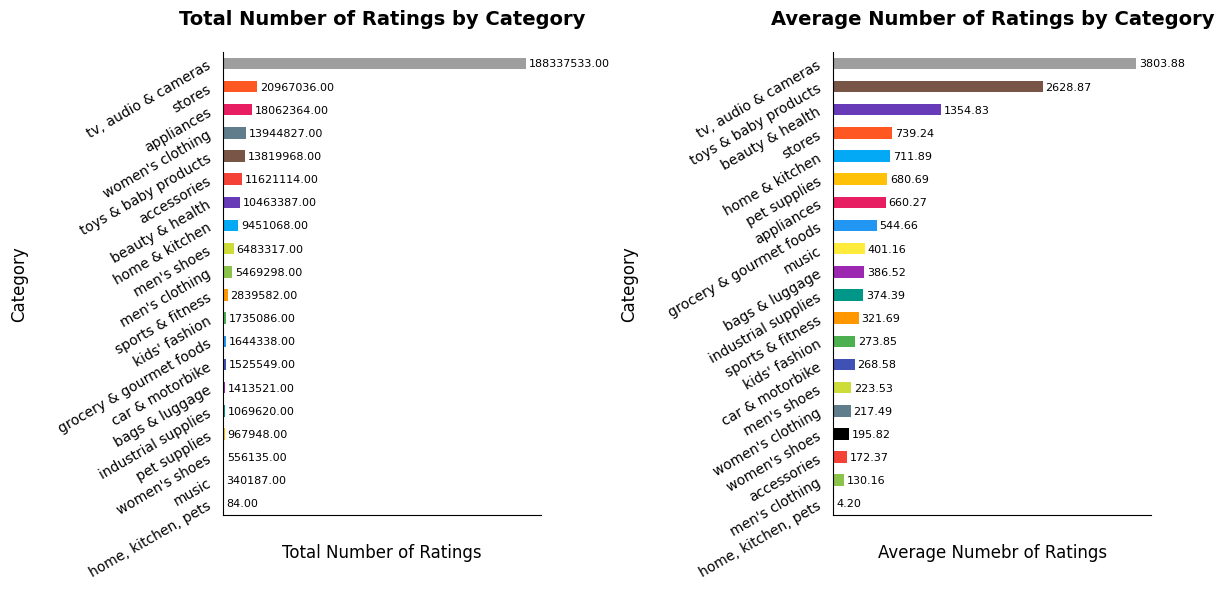

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Group and calculate total number of ratings in each category
total_no_of_ratings = df_copy.groupby(by='main_category')['no_of_ratings'].sum().sort_values()
# Group and calculate average ratings in each category
average_no_of_ratings = df_copy.groupby(by='main_category')['no_of_ratings'].mean().sort_values()

# Define variables
dfs = [total_no_of_ratings, average_no_of_ratings]
titles = ['Total Number of Ratings by Category', 'Average Number of Ratings by Category']
xlabels = ['Total Number of Ratings', 'Average Numebr of Ratings']

# Plot and format bar charts
for _ in range(2):
    plot_category_bars(ax[_], dfs[_])
    add_chart_title(ax[_], titles[_])
    label_axis(ax[_], xlabels[_], 'Category')
    format_bar_chart(ax[_], 30, '%.2f')

plt.tight_layout()

*Although the number of ratings does not directly represent the actual number of purchases, the total number of ratings generally reflects a category's overall popularity and sales performance, while the average number of ratings indicates the sales performance of individual products within the category. Based on the charts, the "tv, audio, cameras" category ranks highest in both total and average number of ratings, suggesting that both the category as a whole and its individual products attract a large number of customers, even though it does not have the highest number of products on Amazon.*

*In contrast, the "accessories" category ranks 6th in total number of ratings but 18th in average number of ratings, despite having the highest number of products among the 20 categories. This could indicate either relatively low customer interest and demand or low customer engagement, where customers are less likely to leave ratings after a purchase. For businesses considering entering the market, the "accessories" category may be too competitive to succeed unless the product has highly differentiated features, exceptional quality, or competitive pricing and promotional strategies.*

*We will explore the correlation between total number of products and total number of ratings by category through the scatter chart below.*

### 2.4. Correlation between the total number of products and the total number of ratings by category

In [32]:
def plot_category_scatter(ax, df, x, y):
    colors = [colormap[c] for c in df.index]
    for ticker, row in df.iterrows():
        ax.scatter(row[x], row[y], label=ticker, alpha=0.8, c=colormap[ticker], s=100)

def add_scatter_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, fontsize=9, bbox_to_anchor=(1, 1))

def draw_best_fit_line(ax, df, x, y):
    x = df[x]
    y = df[y]
    a, b = np.polyfit(x, y, 1)
    ax.plot(x, a * x + b)

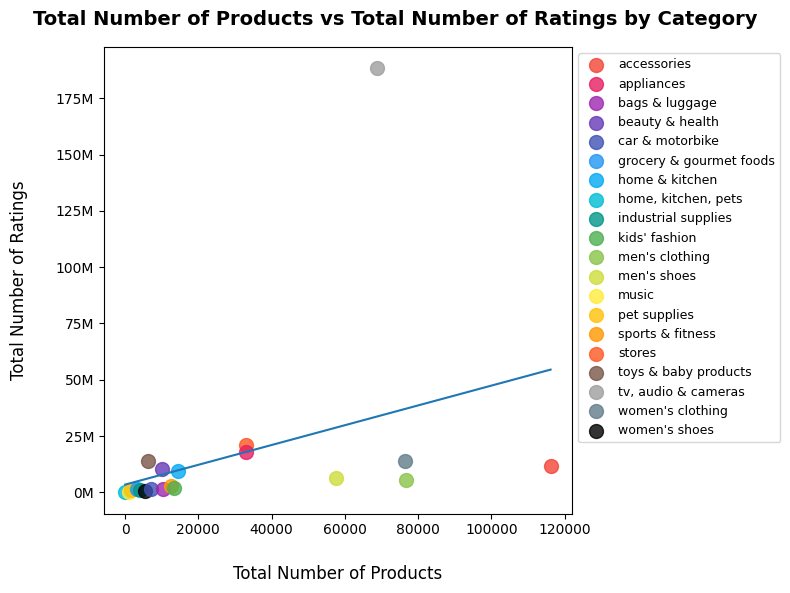

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

# Concat series of number of products and average number of ratings
products_vs_ratings = pd.concat([no_of_products, total_no_of_ratings], keys=['no_of_products', 'no_of_ratings'], axis=1)
# Plot scatter chart
plot_category_scatter(ax, products_vs_ratings, 'no_of_products', 'no_of_ratings')

add_suptitle(fig, 'Total Number of Products vs Total Number of Ratings by Category')
label_axis(ax, 'Total Number of Products', 'Total Number of Ratings')
draw_best_fit_line(ax, products_vs_ratings, 'no_of_products', 'no_of_ratings')
add_scatter_legend(ax)

# Change y-axis tick labels to thousands (K)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(['{:.0f}'.format(x) + 'M' for x in ax.get_yticks() / 1000000])

plt.tight_layout()

*The scatter plot suggests a weak positive correlation between the total number of products and the total number of ratings by category.*

*Categories above the line of best fit, such as "toys & baby products," "beauty & health," and "stores," may be promising for new product releases. These categories have relatively fewer products, indicating lower competition, but show a satisfactory total number of ratings, suggesting higher customer engagement or purchases. On the other hand, the "TV, Audio, & Camera" category, while potentially offering significant sales opportunities, faces intense market competition, which could make it more challenging for new entrants.*

*In the following section, we will examine the average ratings by category to gain insights into customer satisfaction with products across different categories.*

### 2.5. Average ratings and average number of ratings by category

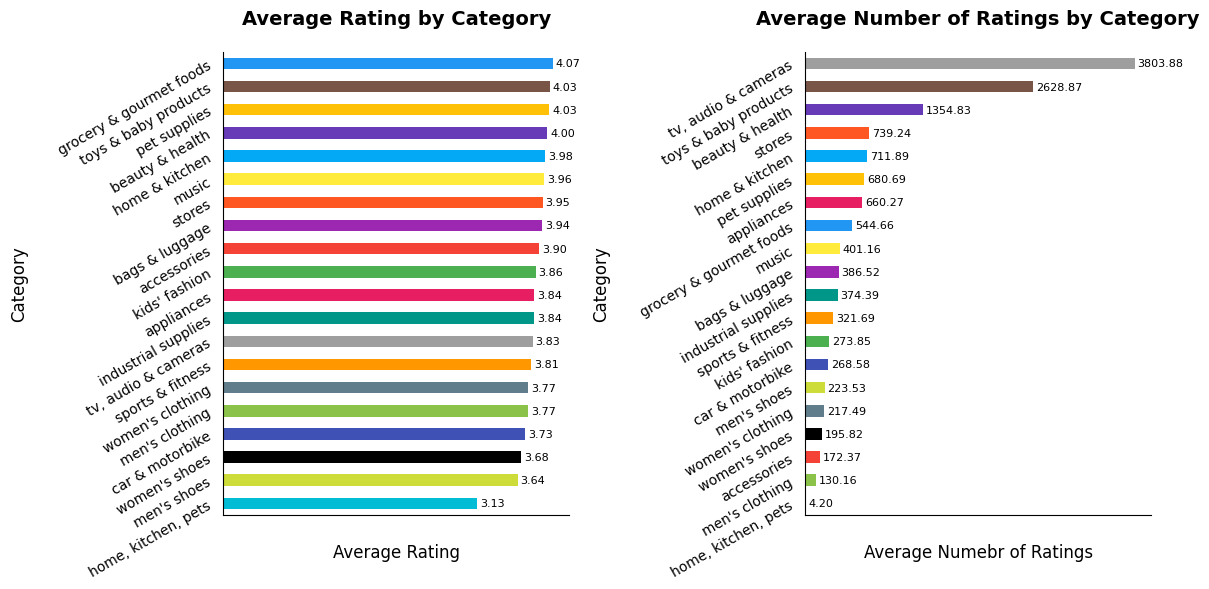

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Group and calculate average ratings in each category
average_ratings = df_copy.groupby(by='main_category')['ratings'].mean().sort_values()

# Define variables
dfs = [average_ratings, average_no_of_ratings]
titles = ['Average Rating by Category', 'Average Number of Ratings by Category']
xlabels = ['Average Rating', 'Average Numebr of Ratings']

# Plot and format bar charts
for _ in range(2):
    plot_category_bars(ax[_], dfs[_])
    add_chart_title(ax[_], titles[_])
    label_axis(ax[_], xlabels[_], 'Category')
    format_bar_chart(ax[_], 30, '%.2f')

plt.tight_layout()

*In terms of average rating, the "grocery & gourmet foods" category excels, ranking 1st out of 20 categories. In contrast, the "home, kitchen, pets" category lags with an average rating of just 3.13, which even falls below the 25th percentile of 3.50 for ratings of all products (see 2.1).*

*Considering both the average rating and the average number of ratings, the "toys & baby products" category demonstrates the best overall performance, ranking 2nd in both metrics. The high average number of ratings suggests that products in this category achieve strong customer engagement and potentially more purchases, and the high average rating reflects strong customer satisfaction. For businesses contemplating entry into this market, this is a positive indicator, as it signals a well-established positive market reception. Entering with products of similar or superior quality could be advantageous given the existing favourable customer sentiment.*

*Next, we will perform a pricing analysis to evaluate the level of discount competition across various categories.*

### 2.6. Average discount amount off and percentage off by category

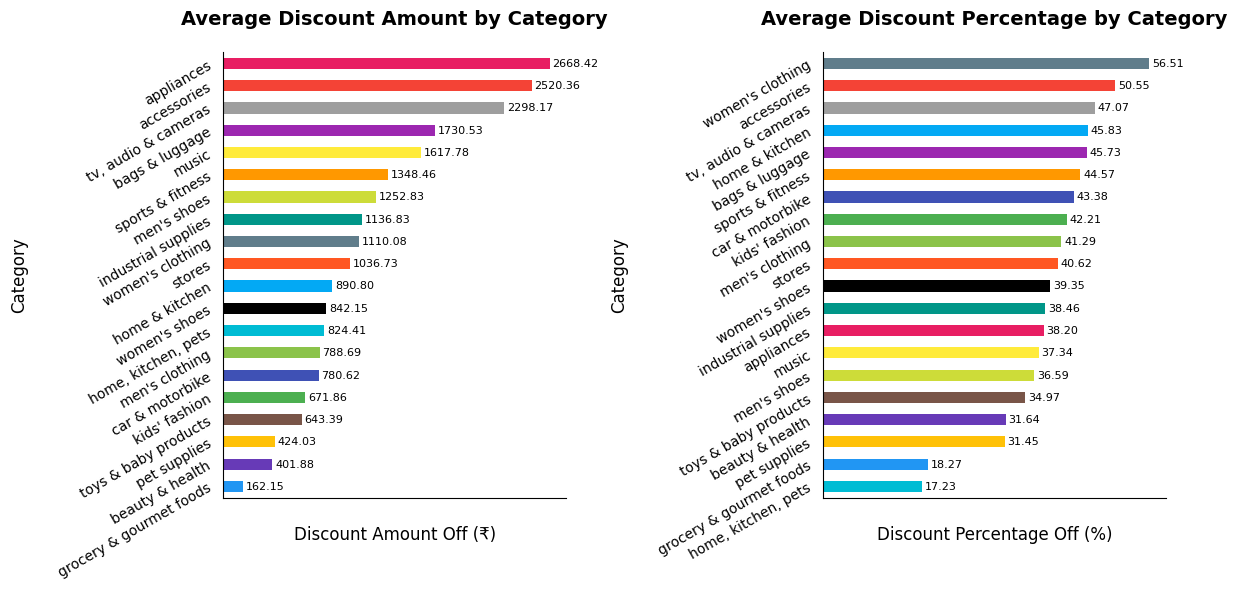

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Calculate average discount amount by category and sort the result
average_discount_amount = df_copy.groupby('main_category')['discount_amount'].mean().sort_values()
# Calculate average discount percentage by category and sort the result
average_discount_percent = df_copy.groupby('main_category')['discount_percent'].mean().sort_values()

# Define variables
dfs = [average_discount_amount, average_discount_percent]
titles = ['Average Discount Amount by Category', 'Average Discount Percentage by Category']
xlabels = ['Discount Amount Off (₹)', 'Discount Percentage Off (%)']

# Plot and format bar charts
for _ in range(2):
    plot_category_bars(ax[_], dfs[_])
    add_chart_title(ax[_], titles[_])
    label_axis(ax[_], xlabels[_], 'Category')
    format_bar_chart(ax[_], 30, '%.2f')

plt.tight_layout()

*A high discount rate may be attributed to intense market competition, as businesses attempt to boost sales by offering lower prices than their competitors.*

*Interestingly, the "women's clothing" category ranks 1st in terms of the average discount percent with an average of 56.5%, significantly higher than other fashion-related categories like "men's clothing", "kid's fashion", "women's shoes", and "men's shoes". This suggests intense competition in the women's clothing market, potentionally driven by exceptionally high demand, rapidly changing fashion trends, and frequent overproduction as a result of fast fashion dynamics. However, due to the generally lower prices of women's clothing products, the category does not rank high in terms of average discount amount, falling behind the "men's shoes." category. In contrast, despite not having a high average percentage off, the "appliances" category ranks first in average discount amount. This is likely because products in the "appliances" category are generally high in price.*

*Considering all the metrics — market competition, customer interest and engagement, customer satisfaction, and pricing competition — the "toys & baby products" and "beauty & health" categories emerge as promising options for selling on Amazon. These categories have a relatively low number of products, indicating possibly less market saturation and competition, while showing high total and average number of ratings, reflecting strong customer interest and potential for high sales. The high average rating further reflects strong customer satisfaction and sentiment. Additionally, the lower levels of pricing and discount competition suggest it may be easier to attract customers and boost sales without facing intense discounting pressure. In contrast, the "stores" category, with higher average discount percentage as well as an above-average number of products, likely faces stronger discount and market competition.*

*Finally, we will examine the correlation between the total number of products and the average discount percentage, as both metrics may serve as indicators of market competition.*

### 2.7. Correlation between total number of products and average discount percentage by category

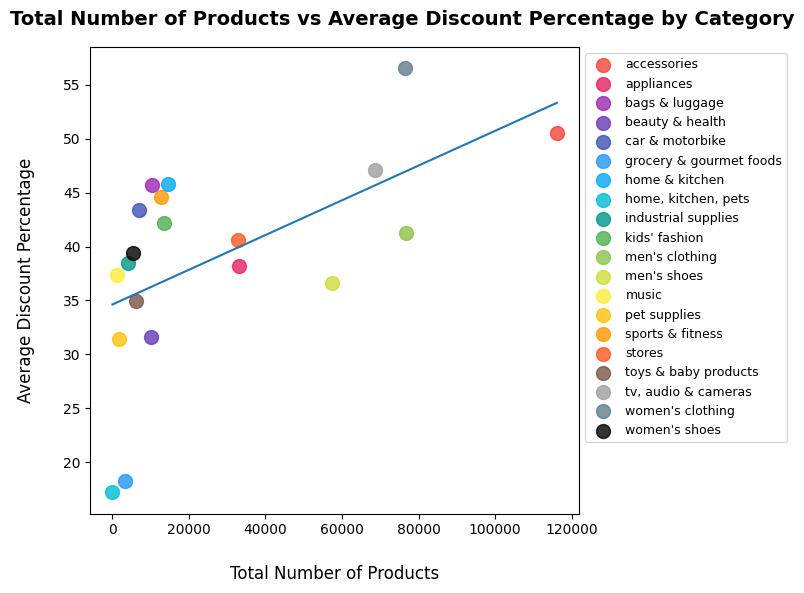

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

# Concat series of number of products and average discount percent
productCount_vs_discountPercent = pd.concat([no_of_products, average_discount_percent], keys=['no_of_products', 'average_discount_percent'], axis=1)

# Plot scatter chart
plot_category_scatter(ax, productCount_vs_discountPercent, 'no_of_products', 'average_discount_percent')

add_suptitle(fig, 'Total Number of Products vs Average Discount Percentage by Category')
label_axis(ax, 'Total Number of Products', 'Average Discount Percentage')
draw_best_fit_line(ax, productCount_vs_discountPercent, 'no_of_products', 'average_discount_percent')
add_scatter_legend(ax)

plt.tight_layout()

*The scatter plot suggests a positive correlation between the number of products (indicating market competition) and the average percentage of discounts applied across categories. This is reasonable, as intense competition often drives businesses to lower their prices to attract customers, boost sales, and differentiate themselves from competitors.*

***

#### Conclusion

The "toys & baby products" and "beauty & health" categories appear ideal for selling on Amazon due to the following factors:
1. **Low market competition**, as indicated by a lower number of products and average discount percentage.
2. **Relatively high demand and customer interests**, shown by the total and average number of ratings.
3. **Positive customer sentiment**, reflected in the high average ratings.
4. **Less intense discount competition**, evidenced by a lower discount percentage.

Despite the above conclusions, a deeper analysis of subcategories and individual products within these categories is still necessary for more precise, data-driven business decision-making.